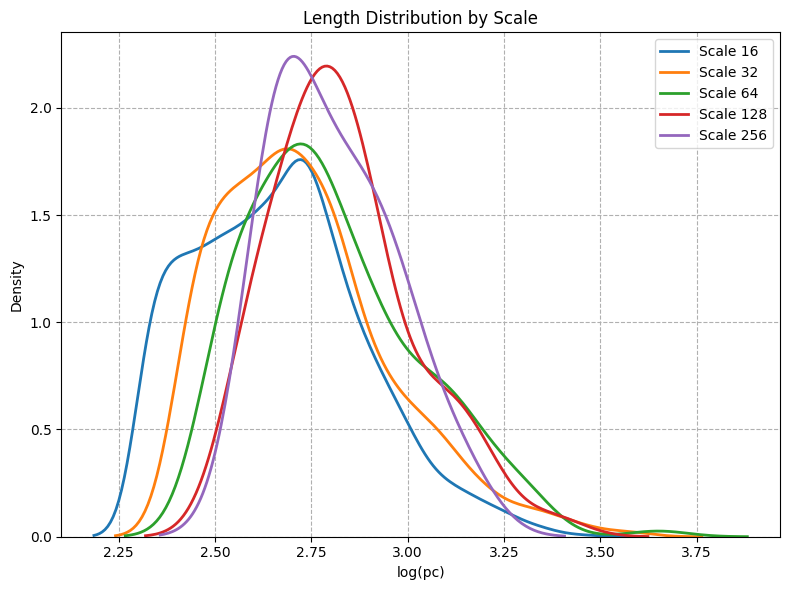

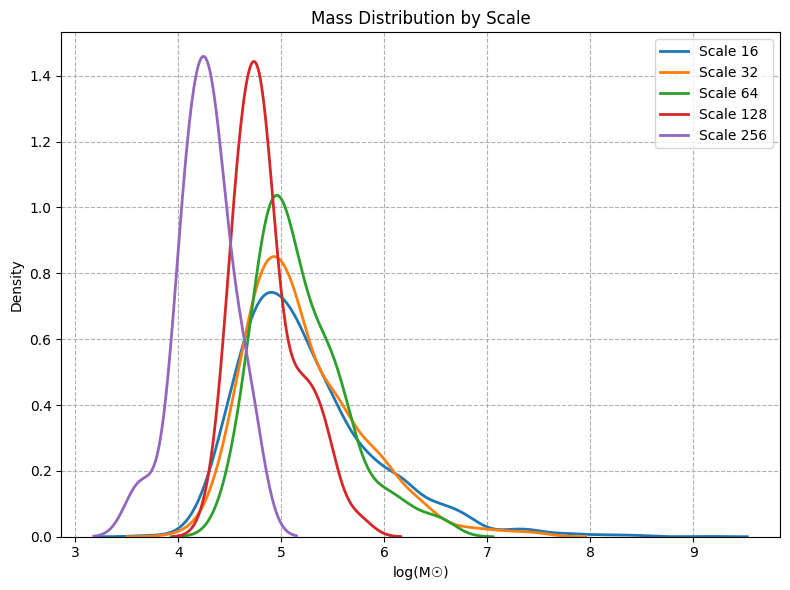

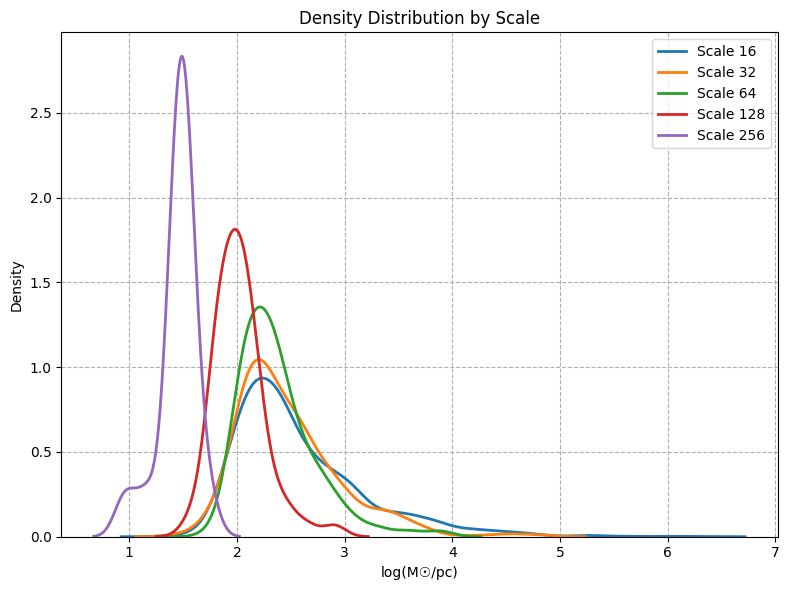

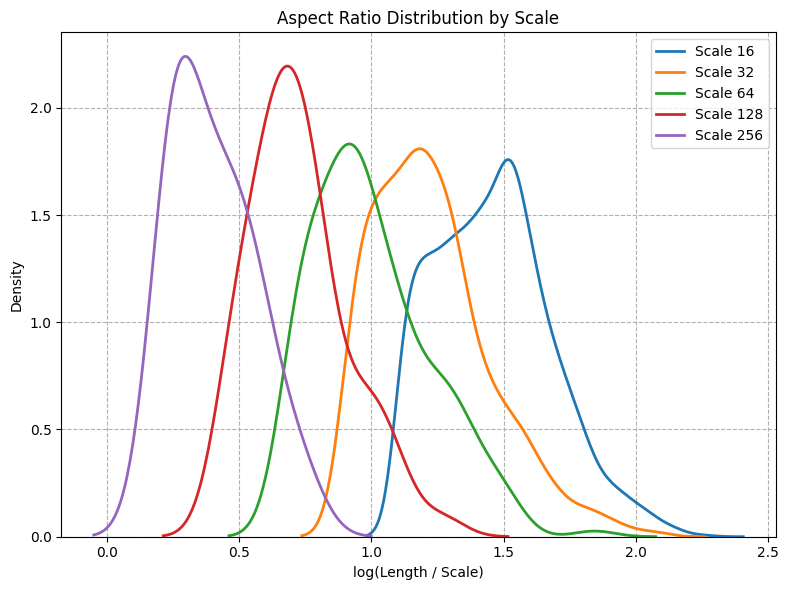

In [8]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define your data path
folder_path = Path(r"C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc0628_F770W\SyntheticMap")

# Initialize data containers
mass_dict = {}
length_dict = {}
density_dict = {}
aspect_ratio_dict = {}

def getScale(file):
    scales = ["1024", "512", "256", "128", "64", "32", "16", "8", "4", "2", "1", ".5", ".25", ".125", ".0625", ".03125"]
    for scale in scales:
        if scale in file:
            return scale
    print("Invalid file: Scale not recognized")
    return None

# Load and categorize data
for file in os.listdir(folder_path):
    if not file.endswith(".fits"):
        file_path = os.path.join(folder_path, file)
        if file.endswith(".xlsx"):
            df = pd.read_excel(file_path, engine='openpyxl')
        elif file.endswith(".xls"):
            df = pd.read_excel(file_path)
        elif file.endswith(".csv"):
            df = pd.read_csv(file_path)

        scale = getScale(file_path)
        if scale is None:
            continue

        try:
            mass = df[f'Mass_{scale}']
            if scale!=16:
                Line_Density = df[f'Line_Density_{scale}'] /math.log2(int(scale))
                lengths = df[f'Length_{scale}'] * math.log2(int(scale))
            else: 
                Line_Density = df[f'Line_Density_{scale}'] 
                lengths = df[f'Length_{scale}']

            mass_dict[scale] = np.array(mass)
            length_dict[scale] = np.array(lengths)
            density_dict[scale] = np.array(Line_Density)
            aspect_ratio_dict[scale] = np.array(lengths) / float(scale)
        except KeyError:
            print(f"Missing expected columns for scale {scale} in file: {file}")
        except ValueError:
            print(f"Non-numeric scale detected: {scale}")

# Plotting functions
def plot_quantity(data_dict, quantity_type):
    plt.figure(figsize=(8, 6))
    for scale in sorted(data_dict.keys(), key=lambda x: float(x)):
        data = np.array(data_dict[scale])
        log_data = np.log10(data[data > 0])  # Filter out non-positive values
        sns.kdeplot(log_data, label=f"Scale {scale}", linewidth=2)

    plt.xlabel({
        "length": "log(pc)",
        "mass": "log(M☉)",
        "density": "log(M☉/pc)"
    }[quantity_type])
    plt.ylabel("Density")
    plt.title(f"{quantity_type.capitalize()} Distribution by Scale")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()

def plot_aspect_ratio(data_dict):
    plt.figure(figsize=(8, 6))
    for scale in sorted(data_dict.keys(), key=lambda x: float(x)):
        ratio = data_dict[scale]
        log_ratio = np.log10(ratio[ratio > 0])  # Avoid log(0)
        sns.kdeplot(log_ratio, label=f"Scale {scale}", linewidth=2)

    plt.xlabel("log(Length / Scale)")
    plt.ylabel("Density")
    plt.title("Aspect Ratio Distribution by Scale")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()

# Plot all quantities
plot_quantity(length_dict, "length")
plot_quantity(mass_dict, "mass")
plot_quantity(density_dict, "density")
plot_aspect_ratio(aspect_ratio_dict)


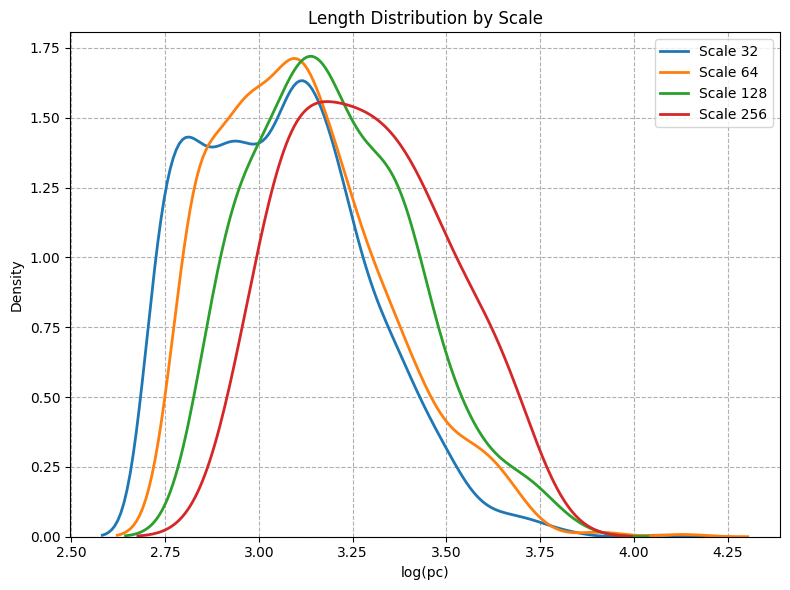

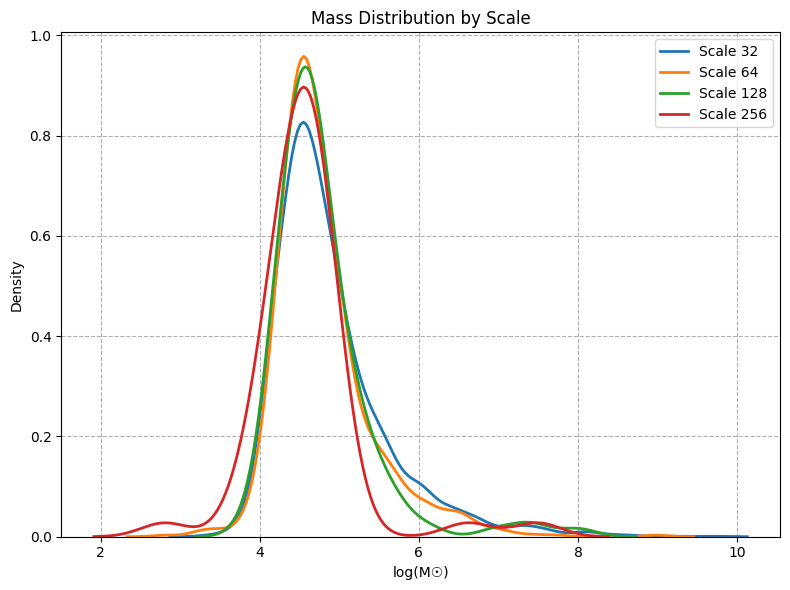

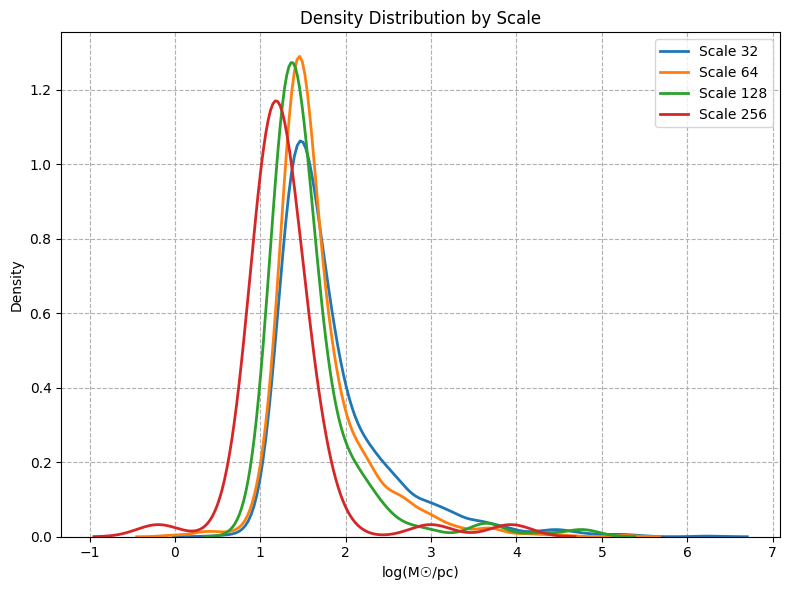

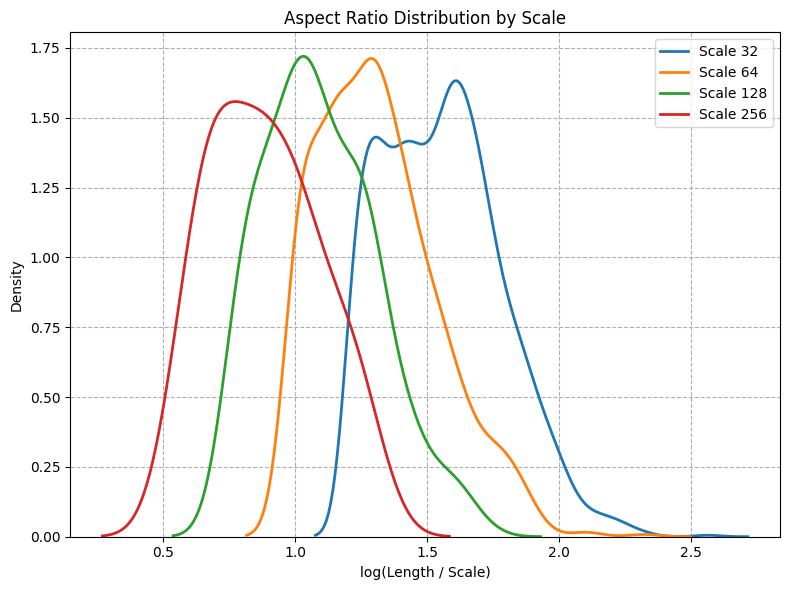

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define your data path
folder_path = Path(r"C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc1365_F770W\SyntheticMap")

# Initialize data containers
mass_dict = {}
length_dict = {}
density_dict = {}
aspect_ratio_dict = {}

def getScale(file):
    scales = ["1024", "512", "256", "128", "64", "32", "16", "8", "4", "2", "1", ".5", ".25", ".125", ".0625", ".03125"]
    for scale in scales:
        if scale in file:
            return scale
    print("Invalid file: Scale not recognized")
    return None

# Load and categorize data
for file in os.listdir(folder_path):
    if not file.endswith(".fits"):
        file_path = os.path.join(folder_path, file)
        if file.endswith(".xlsx"):
            df = pd.read_excel(file_path, engine='openpyxl')
        elif file.endswith(".xls"):
            df = pd.read_excel(file_path)
        elif file.endswith(".csv"):
            df = pd.read_csv(file_path)

        scale = getScale(file_path)
        if scale is None:
            continue

        try:
            mass = df[f'Mass_{scale}']
            if scale!=32:
                Line_Density = df[f'Line_Density_{scale}'] /math.log2(int(scale))
                lengths = df[f'Length_{scale}'] * math.log2(int(scale))
            else: 
                Line_Density = df[f'Line_Density_{scale}'] 
                lengths = df[f'Length_{scale}']

            mass_dict[scale] = np.array(mass)
            length_dict[scale] = np.array(lengths)
            density_dict[scale] = np.array(Line_Density)
            aspect_ratio_dict[scale] = np.array(lengths) / float(scale)
        except KeyError:
            print(f"Missing expected columns for scale {scale} in file: {file}")
        except ValueError:
            print(f"Non-numeric scale detected: {scale}")

# Plotting functions
def plot_quantity(data_dict, quantity_type):
    plt.figure(figsize=(8, 6))
    for scale in sorted(data_dict.keys(), key=lambda x: float(x)):
        data = np.array(data_dict[scale])
        log_data = np.log10(data[data > 0])  # Filter out non-positive values
        sns.kdeplot(log_data, label=f"Scale {scale}", linewidth=2)

    plt.xlabel({
        "length": "log(pc)",
        "mass": "log(M☉)",
        "density": "log(M☉/pc)"
    }[quantity_type])
    plt.ylabel("Density")
    plt.title(f"{quantity_type.capitalize()} Distribution by Scale")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()

def plot_aspect_ratio(data_dict):
    plt.figure(figsize=(8, 6))
    for scale in sorted(data_dict.keys(), key=lambda x: float(x)):
        ratio = data_dict[scale]
        log_ratio = np.log10(ratio[ratio > 0])  # Avoid log(0)
        sns.kdeplot(log_ratio, label=f"Scale {scale}", linewidth=2)

    plt.xlabel("log(Length / Scale)")
    plt.ylabel("Density")
    plt.title("Aspect Ratio Distribution by Scale")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()

# Plot all quantities
plot_quantity(length_dict, "length")
plot_quantity(mass_dict, "mass")
plot_quantity(density_dict, "density")
plot_aspect_ratio(aspect_ratio_dict)


In [ ]:
#To Do

#0)Source Removal
#2) Determine filament overlap and flux fractions along scales for each filament
#3) Repeat for simulation? Add noise? 
#Monday time: 11:00 am